✅ Environment setup complete
Found 6 stocks:
  1. 1810
  2. 700
  3. 941
  4. 9988
  5. MA_TEST
  6. TEST_TICKER

Analyzing Stock: 1810
Loading: 1810_cleaned.csv
✅ Data loaded successfully: 1857 rows

Technical Analysis Report - 1810

Price Analysis:
  Latest Price: 35.42
  Max Price: 60.15
  Min Price: 8.35
  Average Price: 20.47
  Total Return: 110.83%

Technical Indicator Signals:
  RSI(14): 25.26 → Oversold
  MACD: -1.2862, Signal Line: -1.0643 → Bearish
  MACD Histogram: -0.2220 → Bearish Momentum
  Bollinger Bands: Price broke Lower Band → Possible Rebound

📊 Generating Technical Analysis Dashboard...


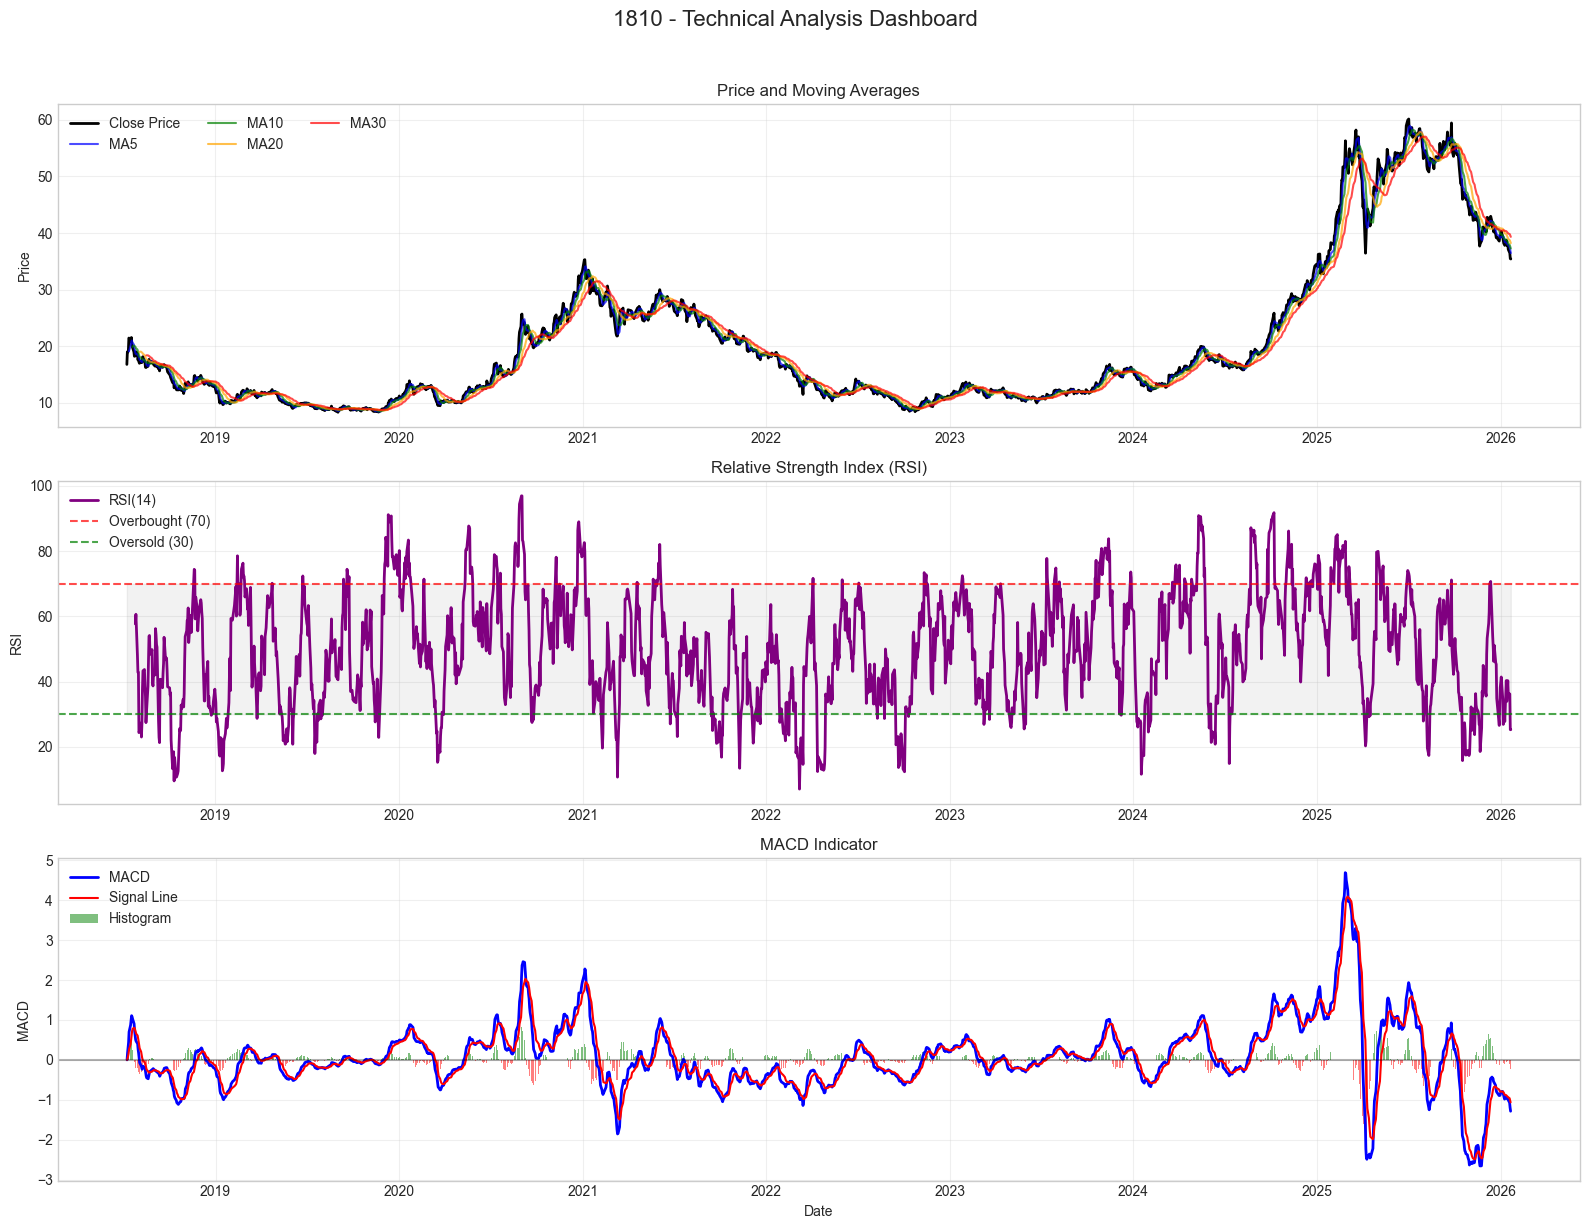

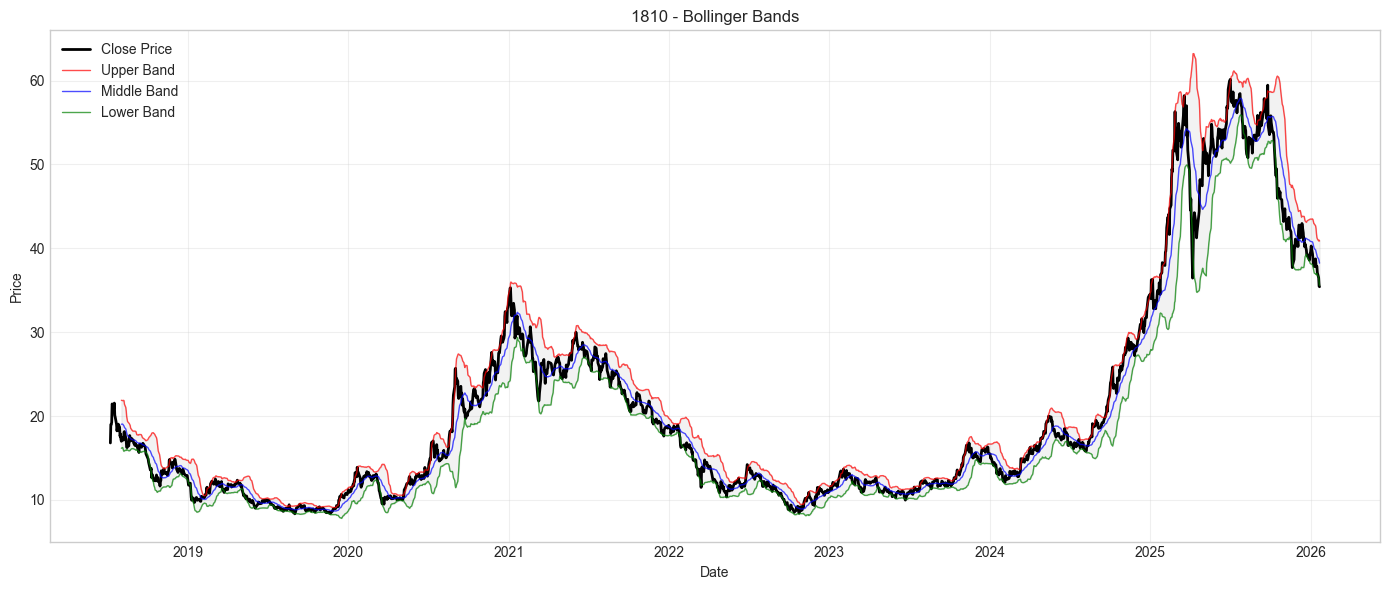


📋 Latest Technical Indicator Data:
            close    MA_5   MA_10   MA_20      MA_30      MA_60        RSI      MACD  MACD_Signal  MACD_Hist  BB_Middle   BB_Upper   BB_Lower
date                                                                                                                                         
2026-01-19  36.48  37.440  37.870  38.726  39.800000  41.048333  36.220472 -1.072276    -0.961672  -0.110604     38.726  40.885965  36.566035
2026-01-20  35.48  36.940  37.542  38.490  39.583333  40.867333  25.255102 -1.197217    -1.008781  -0.188436     38.490  40.978322  36.001678
2026-01-21  35.42  36.468  37.268  38.234  39.338000  40.678667  25.255102 -1.286247    -1.064274  -0.221973     38.234  40.882633  35.585367
📈 Technical Analysis Complete

Analysis Summary:
  1. Price Trend Analysis
  2. Moving Average Analysis
  3. RSI Overbought/Oversold Analysis
  4. MACD Trend Analysis
  5. Bollinger Bands Channel Analysis

💡 Indicator Interpretations:
  • RSI > 70: Overb

In [2]:
# %% [markdown]
# # 📈 Stock Technical Analysis
# 
# In-depth analysis of stock technical indicators
# 

# %%
# Import basic libraries
import sys
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Add project root path
project_root = Path.cwd().parent
sys.path.append(str(project_root))

# Set style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (14, 8)

print("✅ Environment setup complete")

# %%
# Define Technical Analysis Class
class TechnicalAnalyzer:
    """Technical Analysis Toolkit"""
    
    def __init__(self):
        self.project_root = project_root
        self.data_dir = project_root / "data" / "cleaned"
        
    def get_stock_list(self):
        """Get stock list"""
        if not self.data_dir.exists():
            return []
        
        files = list(self.data_dir.glob("*.csv"))
        stocks = []
        for f in files:
            name = f.stem
            # Extract stock ticker
            if '_cleaned' in name:
                ticker = name.replace('_cleaned', '')
            else:
                # Try to extract numeric codes
                import re
                numbers = re.findall(r'\d+', name)
                ticker = numbers[0] if numbers else name
            stocks.append(ticker)
        
        return sorted(list(set(stocks)))
    
    def load_data(self, ticker):
        """Load stock data"""
        if not self.data_dir.exists():
            print(f"Data directory does not exist: {self.data_dir}")
            return None
        
        # Search for file
        found_files = []
        for file in self.data_dir.glob("*.csv"):
            if ticker in file.stem:
                found_files.append(file)
        
        if not found_files:
            # Try fuzzy matching
            for file in self.data_dir.glob("*.csv"):
                if ticker.replace('.', '').replace('HK', '') in file.stem:
                    found_files.append(file)
        
        if not found_files:
            print(f"No data found for {ticker}")
            return None
        
        filepath = found_files[0]
        print(f"Loading: {filepath.name}")
        
        try:
            df = pd.read_csv(filepath)
            
            # Set date index
            date_cols = ['date', 'Date', 'datetime', '日期']
            for col in date_cols:
                if col in df.columns:
                    df[col] = pd.to_datetime(df[col])
                    df.set_index(col, inplace=True)
                    break
            
            # Standardize column names
            col_map = {
                '收盘价': 'close', 'Close': 'close', '收盘': 'close',
                '开盘价': 'open', 'Open': 'open', '开盘': 'open',
                '最高价': 'high', 'High': 'high', '最高': 'high',
                '最低价': 'low', 'Low': 'low', '最低': 'low',
                '成交量': 'volume', 'Volume': 'volume'
            }
            
            for old, new in col_map.items():
                if old in df.columns:
                    df.rename(columns={old: new}, inplace=True)
            
            return df
            
        except Exception as e:
            print(f"Load failed: {e}")
            return None
    
    def calculate_indicators(self, df):
        """Calculate technical indicators"""
        if df is None or df.empty:
            return df
        
        result = df.copy()
        
        # Ensure close column exists
        if 'close' not in result.columns:
            print("Missing 'close' column, cannot calculate indicators")
            return result
        
        # 1. Moving Averages
        ma_periods = [5, 10, 20, 30, 60]
        for period in ma_periods:
            if len(result) >= period:
                result[f'MA_{period}'] = result['close'].rolling(window=period).mean()
        
        # 2. RSI
        if len(result) >= 14:
            delta = result['close'].diff()
            gain = (delta.where(delta > 0, 0)).rolling(window=14).mean()
            loss = (-delta.where(delta < 0, 0)).rolling(window=14).mean()
            rs = gain / loss
            result['RSI'] = 100 - (100 / (1 + rs))
        
        # 3. MACD
        if len(result) >= 26:
            ema_12 = result['close'].ewm(span=12, adjust=False).mean()
            ema_26 = result['close'].ewm(span=26, adjust=False).mean()
            result['MACD'] = ema_12 - ema_26
            result['MACD_Signal'] = result['MACD'].ewm(span=9, adjust=False).mean()
            result['MACD_Hist'] = result['MACD'] - result['MACD_Signal']
        
        # 4. Bollinger Bands
        if len(result) >= 20:
            result['BB_Middle'] = result['close'].rolling(window=20).mean()
            bb_std = result['close'].rolling(window=20).std()
            result['BB_Upper'] = result['BB_Middle'] + (bb_std * 2)
            result['BB_Lower'] = result['BB_Middle'] - (bb_std * 2)
        
        # 5. Volatility
        if len(result) >= 20:
            result['returns'] = result['close'].pct_change()
            result['volatility_20d'] = result['returns'].rolling(window=20).std() * np.sqrt(252)
        
        return result
    
    def generate_technical_report(self, df, ticker):
        """Generate Technical Analysis Report"""
        if df is None or df.empty:
            return
        
        print(f"\n{'='*60}")
        print(f"Technical Analysis Report - {ticker}")
        print(f"{'='*60}")
        
        if 'close' in df.columns:
            # Price Analysis
            print(f"\nPrice Analysis:")
            print(f"  Latest Price: {df['close'].iloc[-1]:.2f}")
            print(f"  Max Price: {df['close'].max():.2f}")
            print(f"  Min Price: {df['close'].min():.2f}")
            print(f"  Average Price: {df['close'].mean():.2f}")
            
            # Returns
            total_return = (df['close'].iloc[-1] / df['close'].iloc[0] - 1) * 100
            print(f"  Total Return: {total_return:.2f}%")
        
        # Technical Indicator Signals
        print(f"\nTechnical Indicator Signals:")
        
        # RSI Signal
        if 'RSI' in df.columns:
            rsi = df['RSI'].iloc[-1]
            print(f"  RSI(14): {rsi:.2f}", end=" ")
            if rsi > 70:
                print("→ Overbought")
            elif rsi < 30:
                print("→ Oversold")
            else:
                print("→ Neutral")
        
        # MACD Signal
        if 'MACD' in df.columns and 'MACD_Signal' in df.columns:
            macd = df['MACD'].iloc[-1]
            signal = df['MACD_Signal'].iloc[-1]
            hist = df.get('MACD_Hist', pd.Series([0])).iloc[-1]
            
            print(f"  MACD: {macd:.4f}, Signal Line: {signal:.4f}", end=" ")
            if macd > signal:
                print("→ Bullish")
            else:
                print("→ Bearish")
            
            if 'MACD_Hist' in df.columns:
                print(f"  MACD Histogram: {hist:.4f}", end=" ")
                if hist > 0:
                    print("→ Bullish Momentum")
                else:
                    print("→ Bearish Momentum")
        
        # Moving Average Signals
        ma_signals = []
        for period in [5, 10, 20]:
            ma_col = f'MA_{period}'
            if ma_col in df.columns:
                price = df['close'].iloc[-1]
                ma_value = df[ma_col].iloc[-1]
                if price > ma_value:
                    ma_signals.append(f"Price > MA{period}")
        
        if ma_signals:
            print(f"  Moving Averages: {', '.join(ma_signals)}")
        
        # Bollinger Bands Signal
        if all(col in df.columns for col in ['BB_Upper', 'BB_Middle', 'BB_Lower']):
            price = df['close'].iloc[-1]
            upper = df['BB_Upper'].iloc[-1]
            lower = df['BB_Lower'].iloc[-1]
            
            if price > upper:
                print(f"  Bollinger Bands: Price broke Upper Band → Possible Pullback")
            elif price < lower:
                print(f"  Bollinger Bands: Price broke Lower Band → Possible Rebound")
            else:
                print(f"  Bollinger Bands: Price within channels → Trend Continuation")

# %%
# Initialize Analyzer
analyzer = TechnicalAnalyzer()

# Get available stocks
available_stocks = analyzer.get_stock_list()
print(f"Found {len(available_stocks)} stocks:")
for i, stock in enumerate(available_stocks[:10], 1):
    print(f"  {i}. {stock}")

# %%
# Technical Analysis Demo
if available_stocks:
    # Use first stock
    ticker = available_stocks[0]
    print(f"\nAnalyzing Stock: {ticker}")
    
    # Load data
    df = analyzer.load_data(ticker)
    
    if df is not None and not df.empty:
        print(f"✅ Data loaded successfully: {len(df)} rows")
        
        # Calculate technical indicators
        df_with_indicators = analyzer.calculate_indicators(df)
        
        # Generate technical report
        analyzer.generate_technical_report(df_with_indicators, ticker)
        
        # Create technical chart
        print(f"\n📊 Generating Technical Analysis Dashboard...")
        
        # Create Dashboard
        fig = plt.figure(figsize=(16, 12))
        fig.suptitle(f'{ticker} - Technical Analysis Dashboard', fontsize=16, y=1.02)
        
        # 1. Price and Moving Averages
        ax1 = plt.subplot(3, 1, 1)
        ax1.plot(df.index, df['close'], label='Close Price', linewidth=2, color='black')
        
        # Add Moving Averages
        ma_colors = ['blue', 'green', 'orange', 'red']
        ma_periods = [5, 10, 20, 30]
        for i, period in enumerate(ma_periods):
            ma_col = f'MA_{period}'
            if ma_col in df_with_indicators.columns:
                ax1.plot(df_with_indicators.index, df_with_indicators[ma_col], 
                        label=f'MA{period}', linewidth=1.5, alpha=0.7, color=ma_colors[i])
        
        ax1.set_title('Price and Moving Averages')
        ax1.set_ylabel('Price')
        ax1.legend(loc='upper left', ncol=3)
        ax1.grid(True, alpha=0.3)
        
        # 2. RSI Indicator
        ax2 = plt.subplot(3, 1, 2)
        if 'RSI' in df_with_indicators.columns:
            ax2.plot(df_with_indicators.index, df_with_indicators['RSI'], 
                    label='RSI(14)', linewidth=2, color='purple')
            ax2.fill_between(df_with_indicators.index, 30, 70, alpha=0.1, color='gray')
            ax2.axhline(y=70, color='red', linestyle='--', alpha=0.7, label='Overbought (70)')
            ax2.axhline(y=30, color='green', linestyle='--', alpha=0.7, label='Oversold (30)')
            ax2.set_title('Relative Strength Index (RSI)')
            ax2.set_ylabel('RSI')
            ax2.legend(loc='upper left')
            ax2.grid(True, alpha=0.3)
        else:
            ax2.text(0.5, 0.5, 'Insufficient RSI Data', ha='center', va='center', transform=ax2.transAxes)
        
        # 3. MACD Indicator
        ax3 = plt.subplot(3, 1, 3)
        if 'MACD' in df_with_indicators.columns:
            ax3.plot(df_with_indicators.index, df_with_indicators['MACD'], 
                    label='MACD', linewidth=2, color='blue')
            
            if 'MACD_Signal' in df_with_indicators.columns:
                ax3.plot(df_with_indicators.index, df_with_indicators['MACD_Signal'], 
                        label='Signal Line', linewidth=1.5, color='red')
            
            if 'MACD_Hist' in df_with_indicators.columns:
                colors = ['green' if x >= 0 else 'red' 
                         for x in df_with_indicators['MACD_Hist']]
                ax3.bar(df_with_indicators.index, df_with_indicators['MACD_Hist'], 
                       color=colors, alpha=0.5, label='Histogram')
            
            ax3.axhline(y=0, color='black', linestyle='-', alpha=0.3)
            ax3.set_title('MACD Indicator')
            ax3.set_ylabel('MACD')
            ax3.set_xlabel('Date')
            ax3.legend(loc='upper left')
            ax3.grid(True, alpha=0.3)
        else:
            ax3.text(0.5, 0.5, 'Insufficient MACD Data', ha='center', va='center', transform=ax3.transAxes)
        
        plt.tight_layout()
        plt.show()
        
        # Extra Chart: Bollinger Bands
        if all(col in df_with_indicators.columns for col in ['BB_Upper', 'BB_Middle', 'BB_Lower']):
            fig2, ax = plt.subplots(figsize=(14, 6))
            
            ax.plot(df.index, df['close'], label='Close Price', linewidth=2, color='black')
            ax.plot(df_with_indicators.index, df_with_indicators['BB_Upper'], 
                   label='Upper Band', linewidth=1, color='red', alpha=0.7)
            ax.plot(df_with_indicators.index, df_with_indicators['BB_Middle'], 
                   label='Middle Band', linewidth=1, color='blue', alpha=0.7)
            ax.plot(df_with_indicators.index, df_with_indicators['BB_Lower'], 
                   label='Lower Band', linewidth=1, color='green', alpha=0.7)
            
            ax.fill_between(df_with_indicators.index, 
                           df_with_indicators['BB_Lower'], 
                           df_with_indicators['BB_Upper'], 
                           alpha=0.1, color='gray')
            
            ax.set_title(f'{ticker} - Bollinger Bands')
            ax.set_ylabel('Price')
            ax.set_xlabel('Date')
            ax.legend()
            ax.grid(True, alpha=0.3)
            
            plt.tight_layout()
            plt.show()
        
        # Display technical data
        print(f"\n📋 Latest Technical Indicator Data:")
        tech_cols = ['close']
        for col in df_with_indicators.columns:
            if any(x in col for x in ['MA_', 'RSI', 'MACD', 'BB_']):
                tech_cols.append(col)
        
        if len(tech_cols) > 1:
            last_data = df_with_indicators[tech_cols].tail(3)
            print(last_data.to_string())
        else:
            print("No technical data available")
        
    else:
        print(f"❌ Failed to load data for {ticker}")
else:
    print("❌ No stock data found")

# %% [markdown]
# ## Summary

# %%
print("📈 Technical Analysis Complete")
print("="*50)

print("\nAnalysis Summary:")
analyses = [
    "1. Price Trend Analysis",
    "2. Moving Average Analysis",
    "3. RSI Overbought/Oversold Analysis", 
    "4. MACD Trend Analysis",
    "5. Bollinger Bands Channel Analysis"
]

for analysis in analyses:
    print(f"  {analysis}")

print("\n💡 Indicator Interpretations:")
interpretations = [
    "• RSI > 70: Overbought area, possible pullback",
    "• RSI < 30: Oversold area, possible rebound",
    "• MACD > Signal Line: Bullish signal",
    "• Price broke Upper Band: Possible pullback",
    "• Price broke Lower Band: Possible rebound"
]

for interpretation in interpretations:
    print(f"  {interpretation}")

print("\n--- End of Analysis ---")